In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('loans_full_schema.csv')

In [3]:
data.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
data.groupby('state')['emp_title'].count()

state
AK      32
AL     109
AR      60
AZ     235
CA    1227
CO     215
CT     170
DC      18
DE      21
FL     656
GA     306
HI      34
ID      32
IL     359
IN     164
KS      81
KY      92
LA      87
MA     225
MD     225
ME      24
MI     218
MN     151
MO     144
MS      62
MT      22
NC     274
ND      13
NE      50
NH      44
NJ     308
NM      39
NV     142
NY     728
OH     307
OK      75
OR     124
PA     269
RI      50
SC     127
SD      18
TN     153
TX     752
UT      57
VA     240
VT      21
WA     217
WI     116
WV      57
WY      17
Name: emp_title, dtype: int64

In [5]:
data.groupby('state').agg({'emp_title':'count'}).\
reset_index().state.count()

50

In [6]:
data.groupby('state').agg({'annual_income':'sum'}).\
reset_index().sort_values('annual_income',ascending = False).head(1)

,state,annual_income
4,CA,1.182145e+08


## 1. Describe the dataset and any issues with it

In [7]:
data.shape

(10000, 55)

The data has 10,000 rows and 55 variables. This is a dataset of 10k loans with 55 attributes availabe.

In [8]:
data.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

There are 13 categorial variables (including employment title) and 42 numeriacal variables.

### Numerical Variables Summary Table

In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [10]:
numeric_description = data.describe().transpose()[['count','mean','min','max']]

In [11]:
numrecords = 10000

In [12]:
numeric_description['%populated'] = numeric_description['count']/numrecords*100
numeric_description

,count,mean,min,max,%populated
emp_length,9183.00,5.93,0.00,10.00,91.83
annual_income,10000.00,79222.15,0.00,2300000.00,100.00
debt_to_income,9976.00,19.31,0.00,469.09,99.76
annual_income_joint,1495.00,127914.57,19200.00,1100000.00,14.95
debt_to_income_joint,1495.00,19.98,0.32,39.98,14.95
delinq_2y,10000.00,0.22,0.00,13.00,100.00
months_since_last_delinq,4342.00,36.76,1.00,118.00,43.42
earliest_credit_line,10000.00,2001.29,1963.00,2015.00,100.00
inquiries_last_12m,10000.00,1.96,0.00,29.00,100.00
total_credit_lines,10000.00,22.68,2.00,87.00,100.00


Issues: months_since_90d_late, months_since_last_delinq, annual_income_joint and debt_to_income_joint have lower 50% of value filled, and num_accounts_120d_past_due, months_since_last_credit_inquiry, debt_to_income and emp_length have minor portion of missing values.

### Categorical Variables Summary Table

In [13]:
data_categorical = data[['emp_title','state','homeownership','verified_income','verification_income_joint',\
                         'loan_purpose','application_type','grade','sub_grade','issue_month',\
                        'loan_status','initial_listing_status','disbursement_method']]

In [14]:
data_categorical = data_categorical.astype('object', copy=True)

In [15]:
summary_categrorical=data_categorical.describe().transpose()[['count','unique','top']]\
.rename(columns = {'top':'most common','unique':'# unique values'})
summary_categrorical['% populated'] = summary_categrorical['count']*100/numrecords
summary_categrorical.drop('count',axis = 1)
summary_categrorical

,count,# unique values,most common,% populated
emp_title,9167,4741,manager,91.67
state,10000,50,CA,100.00
homeownership,10000,3,MORTGAGE,100.00
verified_income,10000,3,Source Verified,100.00
verification_income_joint,1455,3,Not Verified,14.55
loan_purpose,10000,12,debt_consolidation,100.00
application_type,10000,2,individual,100.00
grade,10000,7,B,100.00
sub_grade,10000,32,B1,100.00
issue_month,10000,3,Mar-2018,100.00


## 2. Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations

In [16]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

1. Interest Rate

<AxesSubplot:title={'center':'Interest Rates'}>

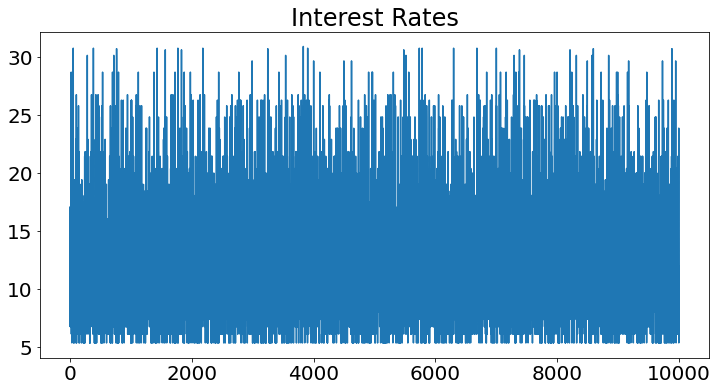

In [17]:
data.interest_rate.plot(title = 'Interest Rates')

Observation: From the graph we can see that the interest rate of each loan is within the range of 5%-30%,most of them are in the range of 10%-15%.

2. homeownership

<AxesSubplot:title={'center':'Home Ownership'}>

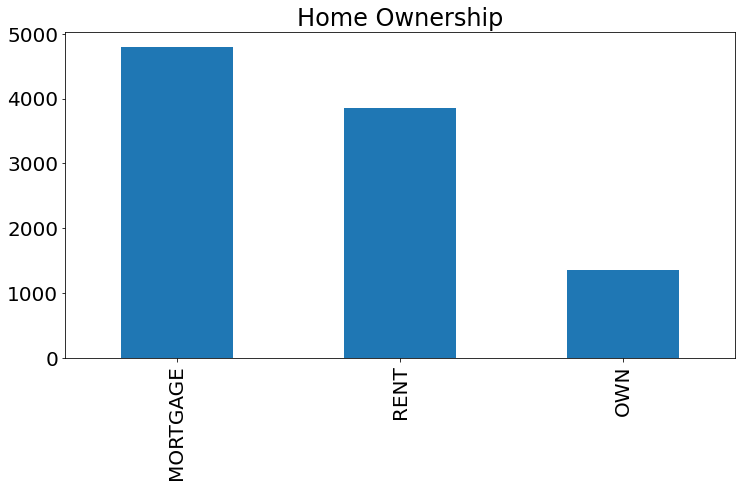

In [18]:
data['homeownership'].value_counts().plot(kind = 'bar',title = 'Home Ownership')

Observation: From the graph we can see that most loan applicant's are on the morgage, only about 15% own a home.

3. Annual Income and Interest Rate

<AxesSubplot:title={'center':'Annual Income vs Interest Rate'}, xlabel='annual_income', ylabel='interest_rate'>

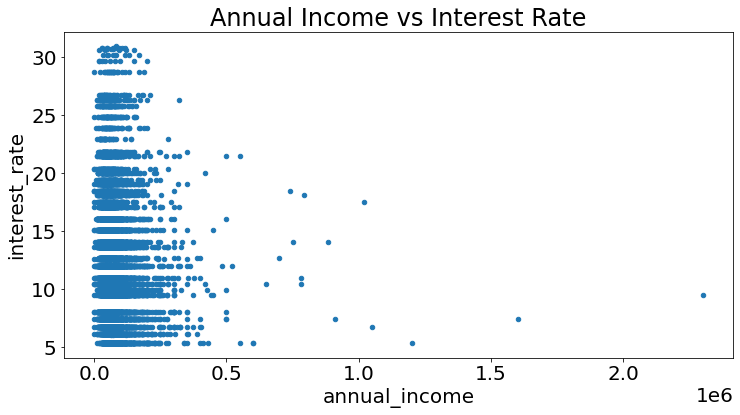

In [19]:
data.plot(kind = 'scatter',x ='annual_income' , y='interest_rate',\
          title = 'Annual Income vs Interest Rate')

Observation: We can see that higher income population tends to enjoy lower interest rate as the highest interest rates are applied uniformly to people with lower income.

4. State Distribution

<AxesSubplot:title={'center':'Loan Distribution'}>

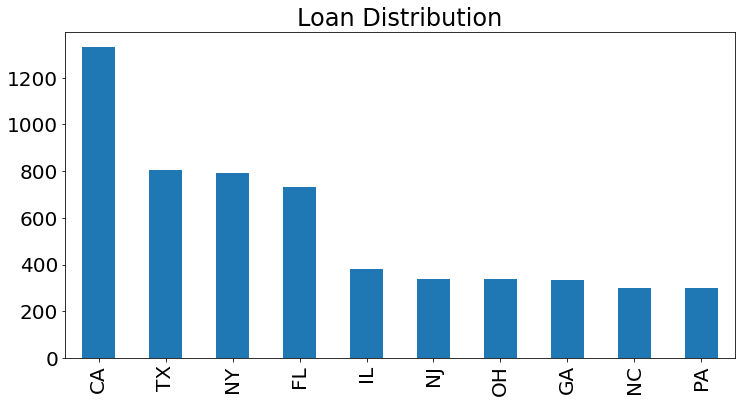

In [20]:
data['state'].value_counts().head(10).plot(kind = 'bar',title = 'Loan Distribution')

Observation: California has the most loan issued, then Texas, New York and Florida. Those 4 sates are the most economically active states in the country.

5. Load Grad

<AxesSubplot:title={'center':'Loan Grade'}>

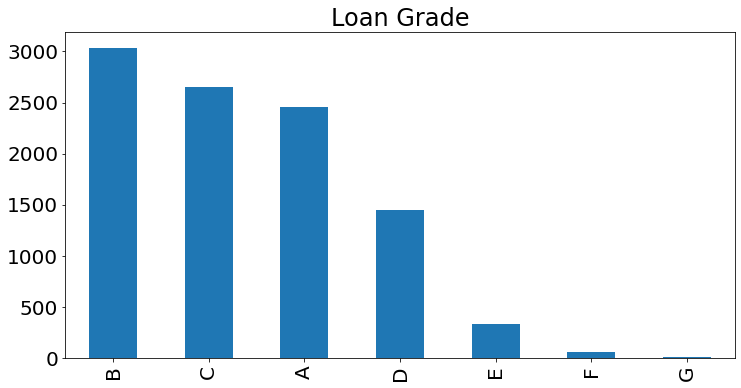

In [21]:
data['grade'].value_counts().plot(kind = 'bar',title = 'Loan Grade')

Observation: We can see that most loans that released are in Grade A,B or C and the number of loans issued under C grade decreases significantly.

### Feature Set & Modeling 

With 14.5% of loan popluation as joint,and the nature that a joint loan should considering the information of the other parties involved, I decided to remove the joint loan to solely consider people who will be solely responsible for the loan.

In [22]:
data_model = data[data['annual_income_joint'].isnull() == True]

In [23]:
data_model

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.00,NJ,MORTGAGE,90000.00,Verified,18.01,nan,NaN,nan,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.00
1,warehouse office clerk,10.00,HI,RENT,40000.00,Not Verified,5.04,nan,NaN,nan,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.00
2,assembly,3.00,WI,RENT,40000.00,Source Verified,21.15,nan,NaN,nan,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.00
3,customer service,1.00,PA,RENT,30000.00,Not Verified,10.16,nan,NaN,nan,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.00
5,NaN,nan,KY,OWN,34000.00,Not Verified,6.46,nan,NaN,nan,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,da coordinator,1.00,WA,RENT,40000.00,Not Verified,12.07,nan,NaN,nan,...,B3,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.00
9995,owner,10.00,TX,RENT,108000.00,Source Verified,22.28,nan,NaN,nan,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.00
9996,director,8.00,PA,MORTGAGE,121000.00,Verified,32.38,nan,NaN,nan,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.00
9998,manager,1.00,WI,MORTGAGE,80000.00,Source Verified,11.99,nan,NaN,nan,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.00


In [24]:
data.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

From the features that we have in the dataset, I choose to exclude some variables that is not related to the interest rate such as title, status of the loan, or paid status, and keep variables that are associated with the risk. Also,'months_since_90d_late' and 'months_since_last_delinq' have too many missing values and the missing could be both interpreted as not late/deliquency or simply missing, different imputations could greatly affect the model so I decide to remove them as well.

In [25]:
feature_set = ['emp_length','state','homeownership','annual_income','verified_income','delinq_2y',\
              'debt_to_income','earliest_credit_line','inquiries_last_12m','total_credit_lines',\
              'open_credit_lines','total_credit_limit','total_credit_utilized','num_collections_last_12m',\
               'num_historical_failed_to_pay', 'current_accounts_delinq',\
               'total_collection_amount_ever', 'current_installment_accounts','accounts_opened_24m',\
                'months_since_last_credit_inquiry','num_satisfactory_accounts', 'num_accounts_120d_past_due',\
               'num_accounts_30d_past_due', 'num_active_debit_accounts','total_debit_limit', 'num_total_cc_accounts',\
                'num_open_cc_accounts','num_cc_carrying_balance', 'num_mort_accounts','account_never_delinq_percent',\
               'public_record_bankrupt','loan_purpose','loan_amount', 'term',\
                'installment', 'grade', 'sub_grade','interest_rate']
      

In [26]:
len(feature_set)

38

38 variables used for model in total.

In [27]:
data_model = data_model[feature_set]

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
data_model 

,emp_length,state,homeownership,annual_income,verified_income,delinq_2y,debt_to_income,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,loan_amount,term,installment,grade,sub_grade,interest_rate
0,3.00,NJ,MORTGAGE,90000.00,Verified,0,18.01,2001,6,28,10,70795,38767,0,0,0,1250,2,5,5.00,10,0.00,0,2,11100,14,8,6,1,92.90,0,moving,28000,60,652.53,C,C3,14.07
1,10.00,HI,RENT,40000.00,Not Verified,0,5.04,1996,1,30,14,28800,4321,0,1,0,0,0,11,8.00,14,0.00,0,3,16500,24,14,4,0,100.00,1,debt_consolidation,5000,36,167.54,C,C1,12.61
2,3.00,WI,RENT,40000.00,Source Verified,0,21.15,2006,4,31,10,24193,16000,0,0,0,432,1,13,7.00,10,0.00,0,3,4300,14,8,6,0,93.50,0,other,2000,36,71.40,D,D1,17.09
3,1.00,PA,RENT,30000.00,Not Verified,0,10.16,2007,0,4,4,25400,4997,0,1,0,0,1,1,15.00,4,0.00,0,2,19400,3,3,2,0,100.00,0,debt_consolidation,21600,36,664.19,A,A3,6.72
5,nan,KY,OWN,34000.00,Not Verified,1,6.46,1990,6,32,12,42100,3898,0,0,0,0,0,2,5.00,12,0.00,0,1,27200,27,12,5,3,78.10,0,other,5000,36,153.75,A,A3,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.00,WA,RENT,40000.00,Not Verified,0,12.07,2008,0,18,13,50932,46132,0,0,0,0,8,3,16.00,13,0.00,0,3,11800,5,5,3,0,88.90,0,credit_card,4800,36,155.81,B,B3,10.41
9995,10.00,TX,RENT,108000.00,Source Verified,0,22.28,2008,5,44,13,199195,77963,0,1,0,0,3,8,6.00,13,0.00,0,4,44600,22,9,4,1,100.00,1,other,24000,36,744.90,A,A4,7.35
9996,8.00,PA,MORTGAGE,121000.00,Verified,4,32.38,1994,1,28,15,382061,101571,0,0,0,0,3,0,1.00,15,0.00,0,5,28200,18,11,8,2,82.10,0,debt_consolidation,10000,36,366.72,D,D3,19.03
9998,1.00,WI,MORTGAGE,80000.00,Source Verified,0,11.99,1999,1,38,15,294475,27641,0,0,0,0,2,2,5.00,15,0.00,0,1,46000,15,9,2,6,100.00,0,other,24000,36,722.76,A,A1,5.32


For the next step, I need to fill in the missing values in emp_length, debt_to_income, months_since_last_credit_inquiry, num_accounts_120d_past_due by average values of the same fields.

In [30]:
sum(data_model['emp_length'].isna())

615

In [31]:
data_model['emp_length'] = data['emp_length'].fillna(data['emp_length'].mean())

<ipython-input-31-aa107234949a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['emp_length'] = data['emp_length'].fillna(data['emp_length'].mean())


In [32]:
sum(data_model['emp_length'].isna())

0

In [33]:
sum(data_model['months_since_last_credit_inquiry'].isna())

1052

In [34]:
data_model['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].fillna(data['months_since_last_credit_inquiry'].mean())

<ipython-input-34-193296433de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].fillna(data['months_since_last_credit_inquiry'].mean())


In [35]:
sum(data_model['months_since_last_credit_inquiry'].isna())

0

In [36]:
sum(data_model['num_accounts_120d_past_due'].isna())

318

In [37]:
data_model['num_accounts_120d_past_due'] = data['num_accounts_120d_past_due'].fillna(data['num_accounts_120d_past_due'].mean())

<ipython-input-37-63979accbc03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['num_accounts_120d_past_due'] = data['num_accounts_120d_past_due'].fillna(data['num_accounts_120d_past_due'].mean())


In [38]:
sum(data_model['num_accounts_120d_past_due'].isna())

0

In [39]:
sum(data_model['debt_to_income'].isna())

0

In [40]:
data_model['debt_to_income'] = data['debt_to_income'].fillna(data['debt_to_income'].mean())

<ipython-input-40-377528201a2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['debt_to_income'] = data['debt_to_income'].fillna(data['debt_to_income'].mean())


In [41]:
sum(data_model['debt_to_income'].isna())

0

Next, I am going to parce the categorical variables into dummy variables for model building.

In [42]:
data_model = pd.get_dummies(data_model, columns=['state','homeownership','verified_income','loan_purpose','grade','sub_grade'])

In [43]:
data_model

,emp_length,annual_income,delinq_2y,debt_to_income,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_amount,term,installment,interest_rate,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G4
0,3.00,90000.00,0,18.01,2001,6,28,10,70795,38767,0,0,0,1250,2,5,5.00,10,0.00,0,2,11100,14,8,6,1,92.90,0,28000,60,652.53,14.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.00,40000.00,0,5.04,1996,1,30,14,28800,4321,0,1,0,0,0,11,8.00,14,0.00,0,3,16500,24,14,4,0,100.00,1,5000,36,167.54,12.61,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.00,40000.00,0,21.15,2006,4,31,10,24193,16000,0,0,0,432,1,13,7.00,10,0.00,0,3,4300,14,8,6,0,93.50,0,2000,36,71.40,17.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,30000.00,0,10.16,2007,0,4,4,25400,4997,0,1,0,0,1,1,15.00,4,0.00,0,2,19400,3,3,2,0,100.00,0,21600,36,664.19,6.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5.93,34000.00,1,6.46,1990,6,32,12,42100,3898,0,0,0,0,0,2,5.00,12,0.00,0,1,27200,27,12,5,3,78.10,0,5000,36,153.75,6.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Train-Test Split

In [44]:
X = data_model.drop('interest_rate', axis=1)

In [45]:
y = data_model['interest_rate']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

1.Model 1: Linear regression model building.

In [47]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression().fit(X_train, y_train)

In [80]:
reg.score(X_train,y_train)

0.9977913545611482

In [81]:
reg.score(X_test,y_test)

0.9994506492854213

In [51]:
predict_1 = reg.predict(X_test)

In [82]:
mean_squared_error(y_test, predict_1)

0.01401631784110165

In [53]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",reg.coef_.transpose())

In [54]:
coef_table.columns

Index([0, 'Coefs'], dtype='object')

In [55]:
coef_table.sort_values('Coefs',ascending = False).rename(columns = {0:'variable name'})

,variable name,Coefs
104,grade_F,8.57
105,grade_G,7.84
103,grade_E,4.76
137,sub_grade_G4,3.96
136,sub_grade_G1,3.88
...,...,...
107,sub_grade_A2,-2.66
106,sub_grade_A1,-3.42
101,grade_C,-3.98
100,grade_B,-7.08


the linear regression model has 0.998 r_squared, meaning that it capures 99.9% of variability in interest rate, and 0.014 MSE, measuring the mean squared error of each point prediction on the testing dataset.

In [83]:
reg_data = pd.DataFrame({'actual':y_test,'predicted':predict_1})

[Text(0.5, 1.0, 'actual vs predicted (LR)')]

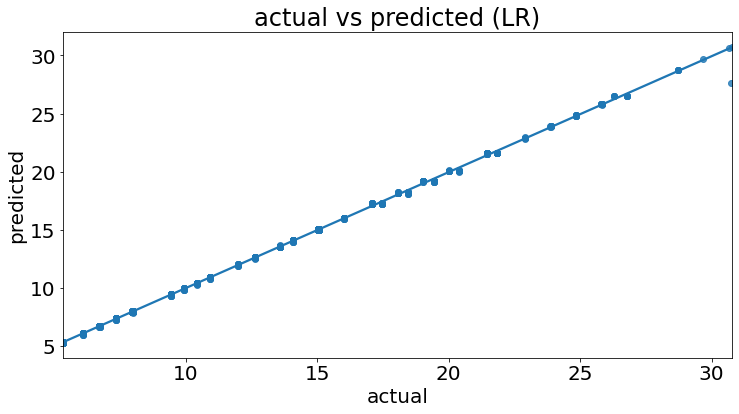

In [84]:
sns.regplot(x="actual", y="predicted", data=reg_data).set(title='actual vs predicted (LR)')

2.Model 2: Random Forest Regression.

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [86]:
rf_reg.fit(X_train,y_train) 

RandomForestRegressor(random_state=0)

In [87]:
predict_2 = rf_reg.predict(X_test)

In [88]:
rf_reg.score(X_train,y_train)

0.9995732515002345

In [89]:
rf_reg.score(X_test,y_test)

0.9993148922962665

In [90]:
mean_squared_error(y_test, predict_2)

0.017480067061128472

The RF model produced 0.9993 r_squared and 0.017 MSE.

In [91]:
rfreg_data = pd.DataFrame({'actual':y_test,'predicted':predict_2})

[Text(0.5, 1.0, 'actual vs predicted(RF)')]

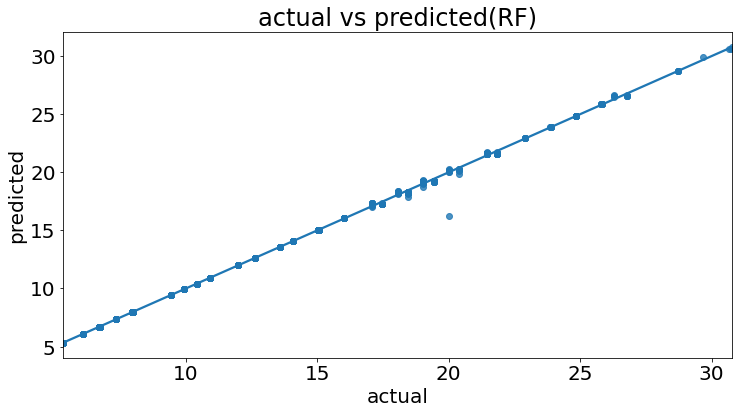

In [92]:
sns.regplot(x="actual", y="predicted", data=rfreg_data).set(title='actual vs predicted(RF)')

In [67]:
importances = list(zip(rf_reg.feature_importances_, X_train.columns))
importances.sort(reverse=True)

In [68]:
importances

[(0.4341550632401082, 'grade_A'),
 (0.28001012273901343, 'grade_B'),
 (0.17676619419907666, 'grade_C'),
 (0.05369148432998483, 'grade_D'),
 (0.008101690602243682, 'sub_grade_D5'),
 (0.00789856044310034, 'sub_grade_C5'),
 (0.0068821328906219035, 'sub_grade_B5'),
 (0.004966299014215615, 'sub_grade_C1'),
 (0.0044775838428819685, 'sub_grade_A1'),
 (0.004204496927251386, 'grade_E'),
 (0.0027913443886764637, 'sub_grade_D1'),
 (0.0022286042865391647, 'sub_grade_C4'),
 (0.0018530526551304436, 'sub_grade_A2'),
 (0.0014073450258227373, 'sub_grade_B4'),
 (0.0013268382455865354, 'sub_grade_D2'),
 (0.0011245227817275483, 'sub_grade_B1'),
 (0.0009030652872123544, 'sub_grade_A5'),
 (0.0008472462561010947, 'sub_grade_A3'),
 (0.000595287369835133, 'sub_grade_D4'),
 (0.0005170069628766363, 'sub_grade_A4'),
 (0.00047522591263861953, 'sub_grade_E5'),
 (0.00046302507256131275, 'sub_grade_E1'),
 (0.00042998146591597135, 'months_since_last_credit_inquiry'),
 (0.00036714552417455926, 'sub_grade_D3'),
 (0.0003

3.Model 3: XGboost Regression

In [69]:
from xgboost import XGBRegressor

In [93]:
xg_reg = XGBRegressor()

In [94]:
xg_reg.fit(X_train,y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [95]:
predict_3 = xg_reg.predict(X_test)

In [96]:
xg_reg.score(X_train,y_train)

0.9999794558078107

In [97]:
xg_reg.score(X_test,y_test)

0.9980082791396565

In [98]:
mean_squared_error(y_test, predict_3)

0.05081743208568006

XGB regression model yields best 0.998 r_squared and 0.05 MSE.

In [99]:
xgreg_data = pd.DataFrame({'actual':y_test,'predicted':predict_3})

[Text(0.5, 1.0, 'actual vs predicted(XGB)')]

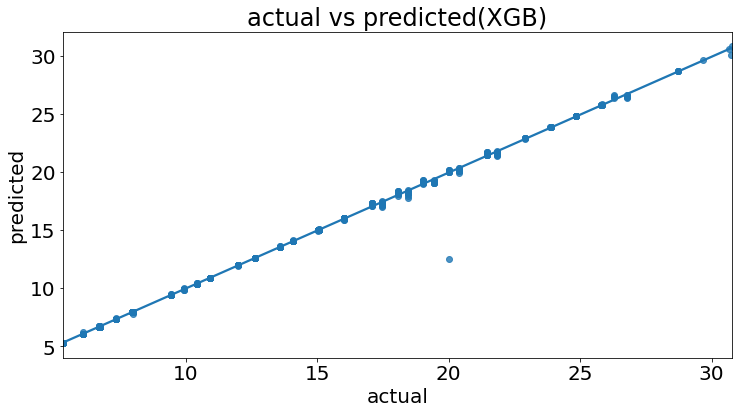

In [100]:
sns.regplot(x="actual", y="predicted", data=xgreg_data).set(title='actual vs predicted(XGB)')

In [78]:
importances2 = list(zip(xg_reg.feature_importances_, X_train.columns))
importances2.sort(reverse=True)
importances2

[(0.42847767, 'grade_A'),
 (0.3249183, 'grade_B'),
 (0.2039416, 'grade_C'),
 (0.0061035934, 'sub_grade_B5'),
 (0.0051082144, 'sub_grade_C5'),
 (0.0048869085, 'grade_D'),
 (0.004568253, 'sub_grade_C1'),
 (0.004510972, 'sub_grade_A1'),
 (0.0028543915, 'sub_grade_D5'),
 (0.0022005222, 'sub_grade_A2'),
 (0.0021523957, 'grade_E'),
 (0.0013511697, 'sub_grade_A3'),
 (0.0013182556, 'sub_grade_C4'),
 (0.0009944943, 'sub_grade_B1'),
 (0.0009720401, 'sub_grade_D1'),
 (0.0009106696, 'sub_grade_B4'),
 (0.0008179951, 'sub_grade_E1'),
 (0.00045928877, 'sub_grade_E2'),
 (0.00045882651, 'sub_grade_B3'),
 (0.00045662624, 'sub_grade_C2'),
 (0.00038664, 'sub_grade_D2'),
 (0.00035153274, 'sub_grade_D4'),
 (0.00029135507, 'sub_grade_B2'),
 (0.000282675, 'sub_grade_C3'),
 (0.00014905194, 'sub_grade_E3'),
 (0.00014431964, 'sub_grade_A4'),
 (0.00011879902, 'sub_grade_E5'),
 (0.000111596804, 'grade_G'),
 (0.00010066587, 'grade_F'),
 (9.315163e-05, 'sub_grade_E4'),
 (8.826928e-05, 'total_credit_lines'),
 (7.2363

Upon 3 models I tried, the linear regression model produces the most pleasing results and better explainability so I decided to use it as the final model.

###  Enhencement Proposal

If I had more time, I would try to include co-loan models to handle cases where more than 1 party were involed in a loan. I would like to treat that as another senario and try to include more features on the information of other applicants, which are not included in this dataset. For example, the annual income,and financial status of the second applicant in the joint loan. Also, although the model has great performance on this dataset, the 10k dataset is still relatively small compared to millions of loan applications in the real life. Therefore, I would like to improve the performance of the model in the following ways if a larger dataset is available: 1. feature engineering, I want to consult professionals and build expert variables. 2. model tunning, I would like to try more machine learning algorithms such as neural network and perform grid search in parameters to find a model that produces the best prediction. 3. validation, I would use cross validation to make sure that the parameter tunning is stable in the real predictions.